<a href="https://colab.research.google.com/github/Chrstphr1995/BDA_Project/blob/Finance-Paper/Paradise_Panama_Papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

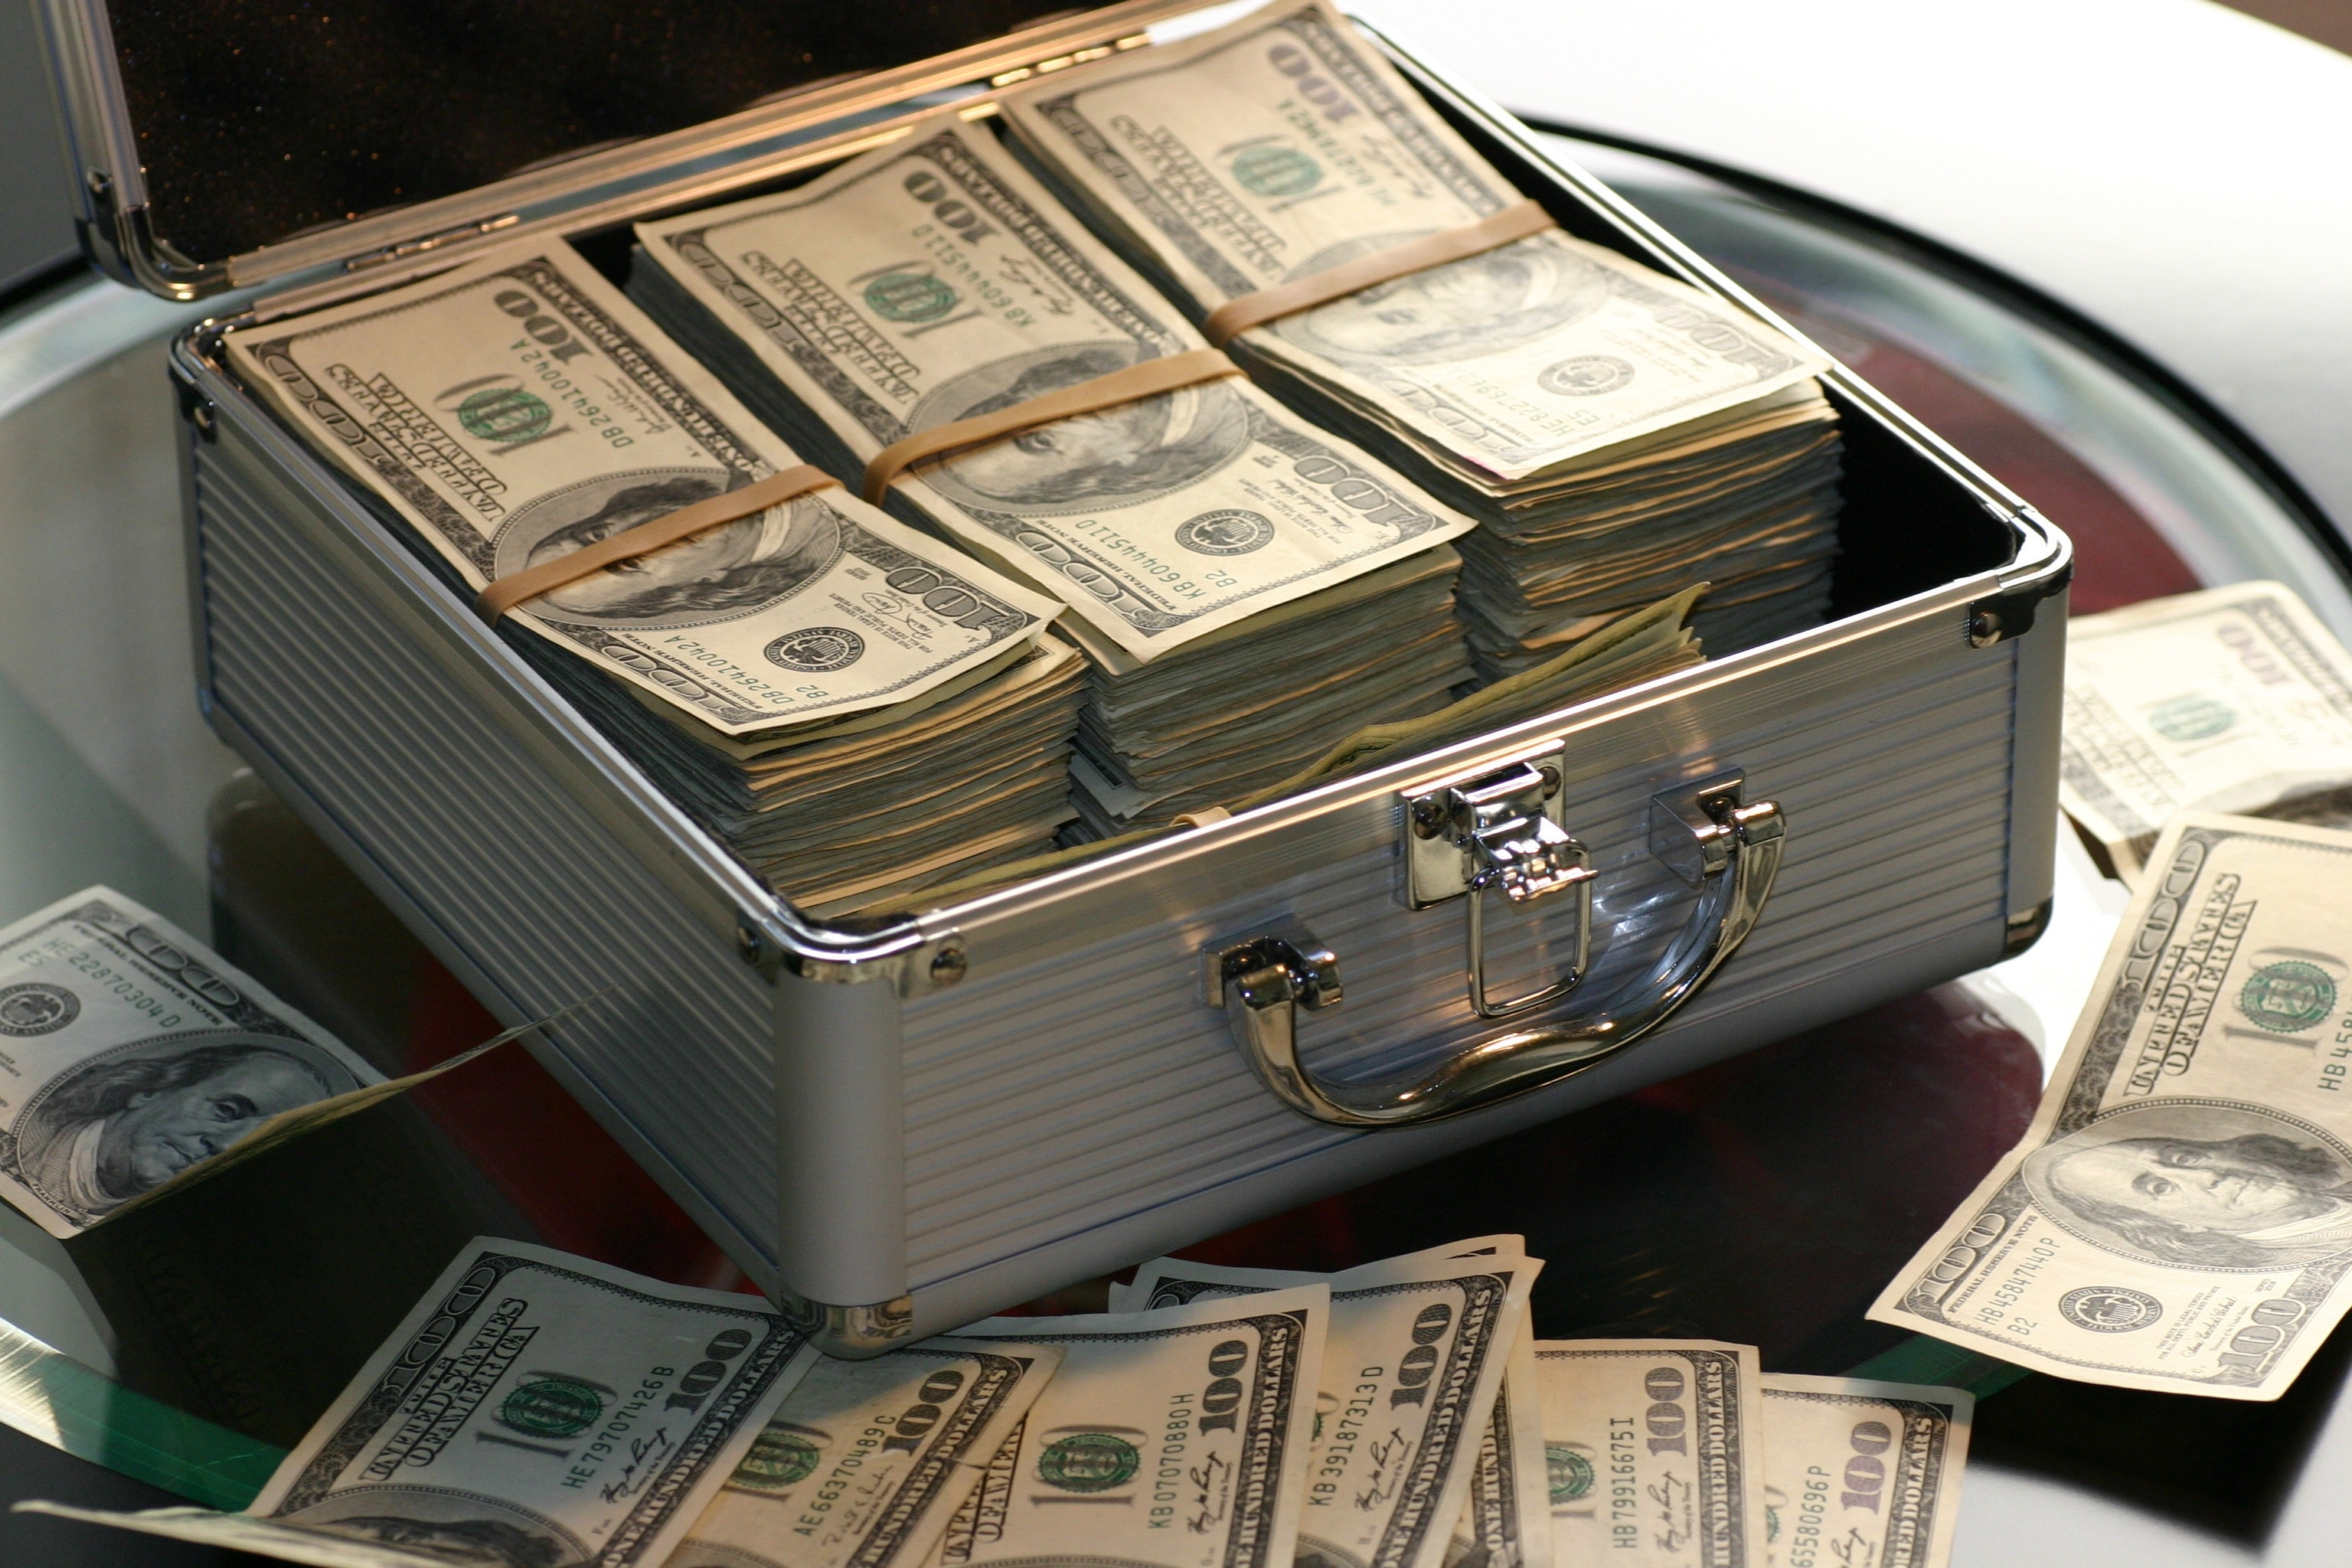

#Finanzbetrug - Spiel mit dem Feuer oder lohnendes Geschäft?

#1 Die Panama Papers, Paradise Papers und Offshore Leaks
>1.1 Die Leaks - eine Reise nach Fernost

>1.2 Das richtige Setup

>1.3 Eine erste Auswertung der Daten

>1.4 Ein positiver Zusammenhang zwischen Finanzbetrug und Weltwirtschaft

>1.5 Die Länder mit den meisten Aktivitäten

>1.6 Datenflut? Ein Überblick!



---



#1.1 Die Leaks - eine Reise nach Fernost

...



---



#1.2 Das richtige Setup

...

In [1]:
#1
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



#1.3 Eine erste Auswertung der Daten

...

In [6]:
#2
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

Text(0.5, 1.0, 'Home Country (n=10)')

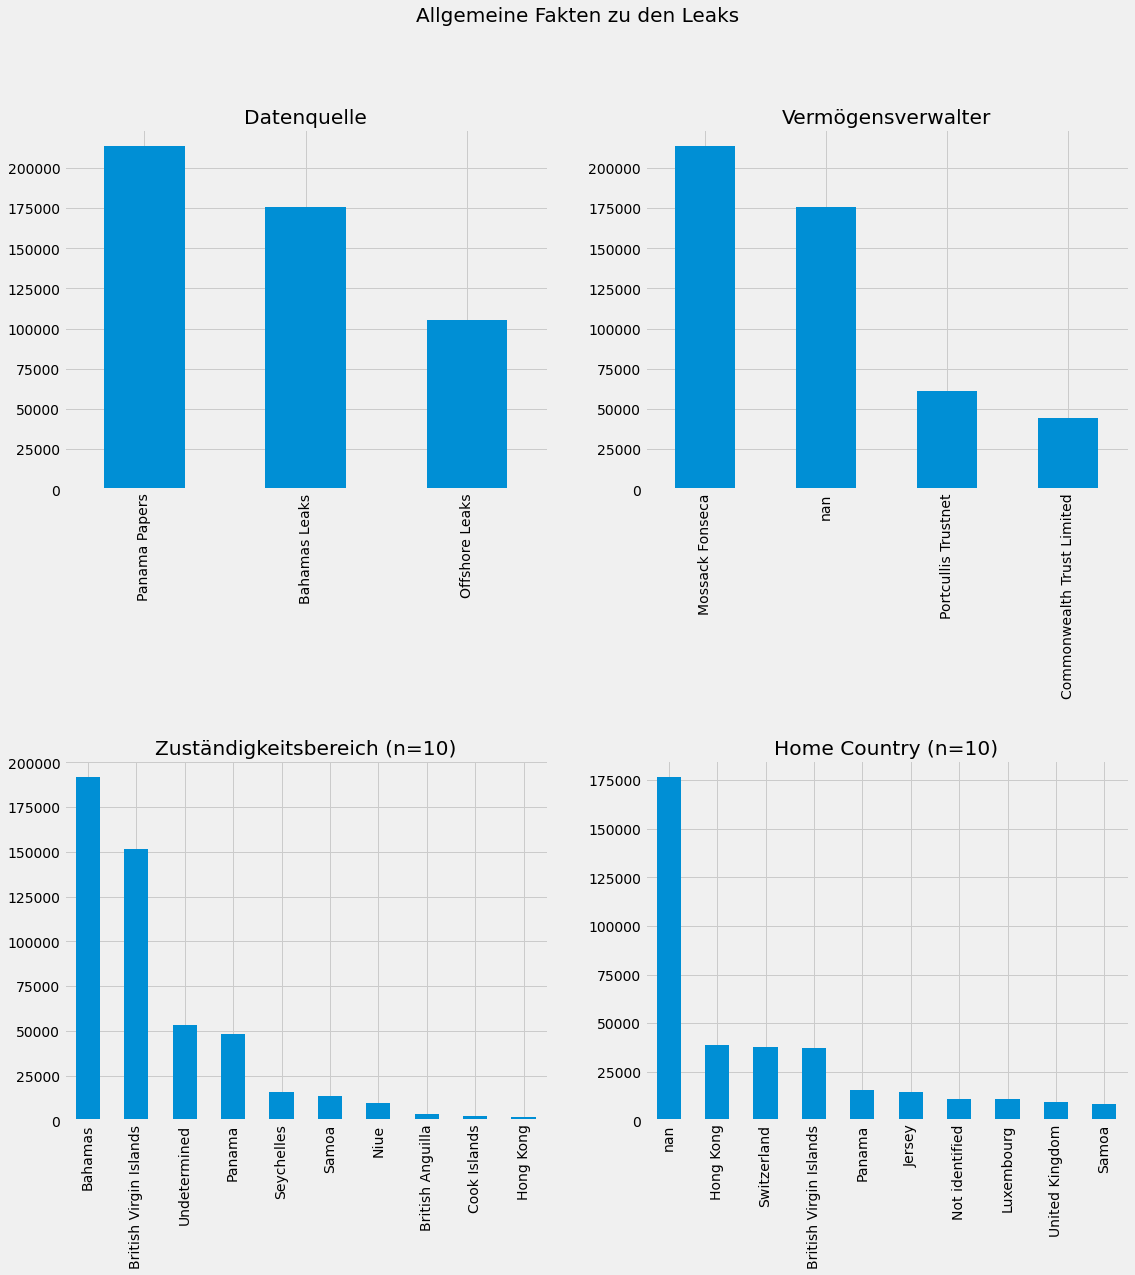

In [10]:
#4
f, axarr = plt.subplots(2, 2, figsize=(17, 17))
f.subplots_adjust(hspace=0.75)
plt.suptitle('Allgemeine Fakten zu den Leaks', fontsize=20)

entities['sourceID'].value_counts().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Datenquelle")

entities['service_provider'].value_counts(dropna=False).plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Vermögensverwalter")

entities['jurisdiction_description'].value_counts().head(10).plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Zuständigkeitsbereich (n=10)")

entities['countries'].value_counts(dropna=False).head(10).plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Home Country (n=10)")



---



#1.4 Ein positiver Zusammenhang zwischen Finanzbetrug und Weltwirtschaft

...

In [11]:
#5
incorporation_dates = pd.to_datetime(entities.incorporation_date)
inactivation_dates = pd.to_datetime(entities.inactivation_date)

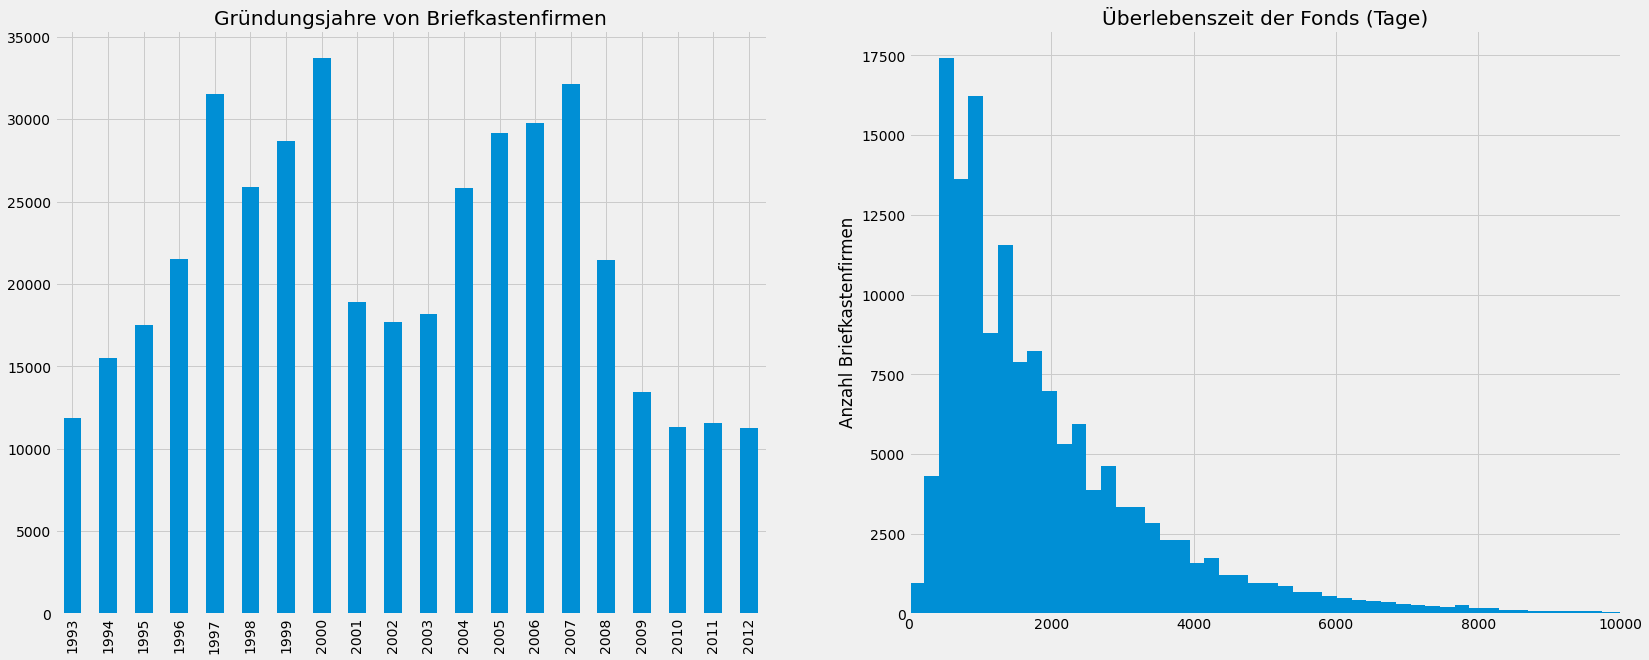

In [18]:
#6
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

f, axarr = plt.subplots(1, 2, figsize=(25, 10))
f.subplots_adjust(hspace=0.75)

incorporation_dates.dt.year.dropna().astype(int).value_counts().head(20).sort_index().plot.bar(
    ax=axarr[0]
)
axarr[0].set_title("Gründungsjahre von Briefkastenfirmen")
plt.ylabel("Briefkastenfirmen")


(inactivation_dates - incorporation_dates).dropna().map(lambda v: v.days).plot.hist(
    ax=axarr[1], bins=200
)
axarr[1].set_title("Überlebenszeit der Fonds (Tage)")
axarr[1].set_xlim([0, 10000])
plt.ylabel("Anzahl Briefkastenfirmen")
pass



---



#1.5 Die Länder mit den meisten Aktivitäten

In [13]:
#7
addresses = pd.read_csv("/content/drive/MyDrive/Addresses.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


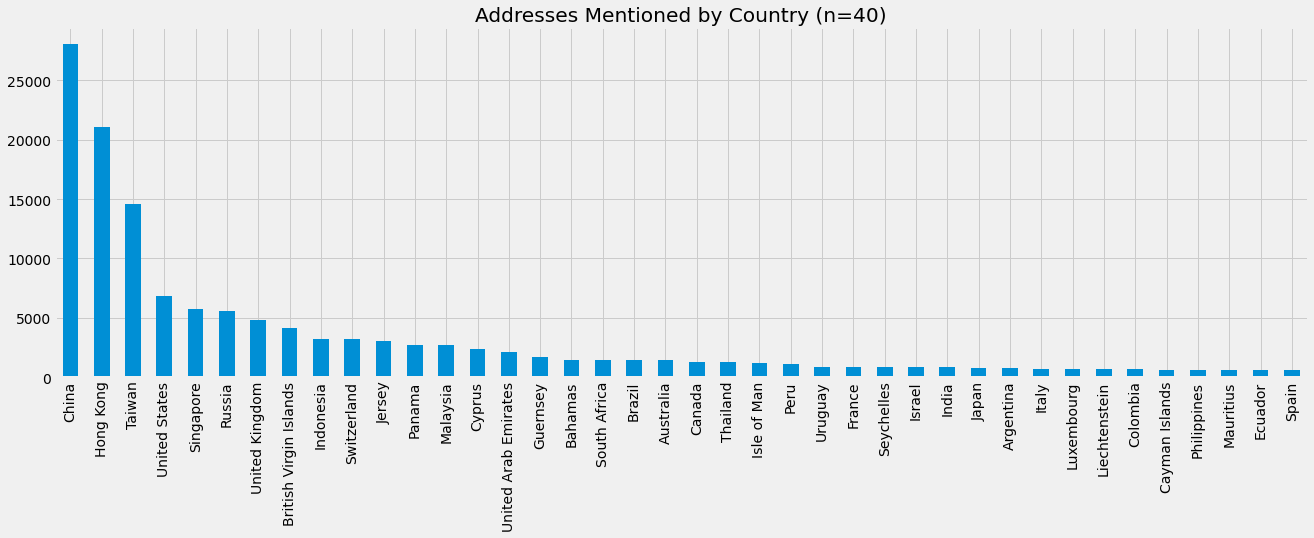

In [14]:
#8
addresses['countries'].value_counts().head(40).plot.bar(
    title='Addresses Mentioned by Country (n=40)', figsize=(20, 6)
)



---



#1.6 Datenflut? Ein Überblick!


https://offshoreleaks.icij.org/nodes/55028359 Unter diesem Link sind alle Verbindungen zu den einzelnen Unternehmen aufgelistet

In [9]:
#3
import pandas as pd
entities = pd.read_csv("/content/drive/MyDrive/Entities.csv")
entities.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,5,6,9,10,11,12,13,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,struck_off_date,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,15-FEB-2013,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,15-FEB-2014,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,15-FEB-2012,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers
3,"SKY-BLUE GIFTS & TOYS CO., LTD.","SKY-BLUE GIFTS & TOYS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000914.0,06-JAN-2006,16-FEB-2009,15-FEB-2009,NaN,Defaulted,Mossack Fonseca,24012,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000004,Panama Papers
4,FORTUNEMAKER INVESTMENTS CORPORATION,FORTUNEMAKER INVESTMENTS CORPORATION,NaN,SAM,Samoa,NaN,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,1001266.0,19-APR-2006,15-MAY-2009,15-FEB-2008,NaN,Changed agent,Mossack Fonseca,R25638,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000005,Panama Papers
